In [1]:
import pandas as pd

In [2]:
my_data=pd.read_csv("C://Users/Brothers/Desktop/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv")

In [3]:
my_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
col=my_data.columns

In [5]:
col

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
my_data[cols]=my_data[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
my_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


# Feature columns

In [9]:
cols=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree','Age']

In [10]:
import numpy as np
import tensorflow as tf

In [11]:
#using loop to get feature columns
feat_cols=[]
for columns in cols:
    feat_cols.append(tf.feature_column.numeric_column(columns))

In [12]:
for i in range(len(feat_cols)):
    print("i :", i)
    print(feat_cols[i])

i : 0
_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
i : 1
_NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
i : 2
_NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
i : 3
_NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
i : 4
_NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
i : 5
_NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
i : 6
_NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
i : 7
_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [13]:
feat_cols[7]

_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [14]:
import matplotlib.pyplot as plt

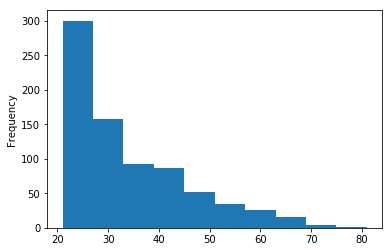

In [15]:
#plotting only age column[just for fun]
my_data['Age'].plot(kind='hist')
plt.show()

In [16]:
#since age is continuous so converting it to cateogorical column for better analysis
age_cated=tf.feature_column.bucketized_column(feat_cols[7], boundaries=[20,30,40,50,60,70,80])

In [17]:
groups=tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=5)

In [18]:
groups

_HashedCategoricalColumn(key='Group', hash_bucket_size=5, dtype=tf.string)

In [19]:
#so feat_cols is my feature column
feat_cols.append(groups)

In [20]:
my_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [21]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


# train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data=my_data.drop('Class',axis=1)

In [24]:
label=my_data['Class']

In [25]:
xtest, xtrain, ytest, ytrain=train_test_split(data, label, test_size=0.3)

In [26]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\Brothers\\AppData\\Local\\Temp\\tmp4eiyib7j', '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_session_config': None}


In [27]:
input_fn=tf.estimator.inputs.pandas_input_fn(xtrain, ytrain, batch_size=5, num_epochs=1000, shuffle=True)

In [28]:
eval_fn=tf.estimator.inputs.pandas_input_fn(xtest, ytest, batch_size=5, num_epochs=1, shuffle=False)

In [29]:
train_metrics=model.train(input_fn=input_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Brothers\AppData\Local\Temp\tmp4eiyib7j\model.ckpt.
INFO:tensorflow:loss = 3.46574, step = 1
INFO:tensorflow:global_step/sec: 200.009
INFO:tensorflow:loss = 3.44566, step = 101 (0.508 sec)
INFO:tensorflow:global_step/sec: 257.084
INFO:tensorflow:loss = 4.22459, step = 201 (0.389 sec)
INFO:tensorflow:global_step/sec: 266.648
INFO:tensorflow:loss = 2.7145, step = 301 (0.384 sec)
INFO:tensorflow:global_step/sec: 242.17
INFO:tensorflow:loss = 3.21729, step = 401 (0.398 sec)
INFO:tensorflow:global_step/sec: 271.721
INFO:tensorflow:loss = 5.66105, step = 501 (0.376 sec)
INFO:tensorflow:global_step/sec: 258.441
INFO:tensorflow:loss = 2.2884, step = 601 (0.390 sec)
INFO:tensorflow:global_step/sec: 248.154
INFO:tensorflow:loss = 2.79833, step = 701 (0.397 sec)
INFO:tensorflow:global_step/sec: 260.399
INFO:tensorflow:loss = 2.71366, step = 801 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.838
IN

In [30]:
eval_metrics=model.evaluate(input_fn=eval_fn)

INFO:tensorflow:Starting evaluation at 2019-05-02-10:04:07
INFO:tensorflow:Restoring parameters from C:\Users\Brothers\AppData\Local\Temp\tmp4eiyib7j\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-05-02-10:04:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.681564, accuracy_baseline = 0.648045, auc = 0.728927, auc_precision_recall = 0.543607, average_loss = 0.586722, global_step = 1000, label/mean = 0.351955, loss = 2.91731, prediction/mean = 0.399256


In [31]:
print("Train metrics: ", train_metrics, "\n")
print("Eval metrics: ",eval_metrics)

Train metrics:  <tensorflow.python.estimator.canned.linear.LinearClassifier object at 0x000001A018923128> 

Eval metrics:  {'accuracy': 0.68156427, 'auc': 0.7289272, 'global_step': 1000, 'prediction/mean': 0.39925578, 'accuracy_baseline': 0.64804471, 'average_loss': 0.58672243, 'auc_precision_recall': 0.54360664, 'loss': 2.9173143, 'label/mean': 0.35195529}


# Pridictions

In [32]:
pred_fn=tf.estimator.inputs.pandas_input_fn(xtest, batch_size=10, num_epochs=1, shuffle=False)

In [33]:
predicted=model.predict(pred_fn)

In [34]:
list(predicted)

INFO:tensorflow:Restoring parameters from C:\Users\Brothers\AppData\Local\Temp\tmp4eiyib7j\model.ckpt-1000


[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.40055427], dtype=float32),
  'logits': array([-0.40315622], dtype=float32),
  'probabilities': array([ 0.59944576,  0.40055427], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.33324641], dtype=float32),
  'logits': array([-0.69353837], dtype=float32),
  'probabilities': array([ 0.66675359,  0.33324641], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.35226414], dtype=float32),
  'logits': array([-0.60910171], dtype=float32),
  'probabilities': array([ 0.64773583,  0.35226411], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.52977419], dtype=float32),
  'logits': array([ 0.1192379], dtype=float32),
  'probabilities': array([ 0.47022578,  0.52977419], dtype=floa

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 54.1+ KB


In [36]:
dnn_model=tf.estimator.DNNClassifier([10,10,10], feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\Brothers\\AppData\\Local\\Temp\\tmpobect80j', '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_session_config': None}


In [37]:
dnn_model.train(input_fn=input_fn)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _HashedCategoricalColumn(key='Group', hash_bucket_size=5, dtype=tf.string)

In [ ]:
embedcols=tf.feature_column.embedding_column(groups, dimension=4)

In [ ]:
feat_cols[8]

In [ ]:
feat_cols.pop(8)

In [ ]:
feat_cols

In [ ]:
feat_cols.append(embedcols)

In [ ]:
dnn_model.train(input_fn=input_fn, steps=1000)

In [ ]:
dnn_model.evaluate(eval_fn, steps=1)